# Exploring Polynomial Features with Regularization

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb 
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

## Data Import & Setup

In [2]:
sf = pd.read_csv('data_files/sf_clean.csv')

# Reformatting hood_district names
sf['hood_district'] = sf['hood_district'].astype(int)
sf['hood_district'] = sf['hood_district'].astype(str)

In [3]:
sf = sf[sf['price'] < 6000]

In [4]:
laundry_dict = {'(a) in-unit': 2, 
               '(b) on-site': 1,
               '(c) no laundry': 0}

sf = sf.replace({'laundry': laundry_dict})

In [5]:
parking_dict = {'(a) valet': 3, 
               '(b) protected': 2,
               '(c) off-street': 1,
               '(d) no parking': 0}

sf = sf.replace({'parking': parking_dict})

In [6]:
pets_dict = {'(a) both': 1, 
            '(b) dogs': 1,
            '(c) cats': 1,
            '(d) no pets': 0}

sf = sf.replace({'pets': pets_dict})

In [7]:
sf = sf.drop(['housing_type'], axis=1)

In [8]:
sf = pd.get_dummies(sf)
sf = sf.drop(['hood_district_10'], axis=1)

## Train / Test Split

In [9]:
X, y = sf.drop('price',axis=1), sf['price']

# Training versus Test Data
# hold out 20% of the data for testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=14)

# Training versus Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=3)

## Polynomial Features Set Up

In [10]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
    
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

In [11]:
# Scaling for Ridge & Lasso 
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)
X_test_scaled = scaler.transform(X_test_poly)

## Lasso

In [12]:
alphavec = 10**np.linspace(-2,1,10000)

lasso_model = LassoCV(alphas=alphavec, cv=3).fit(X_train_scaled, y_train)

/Users/scrapfish/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49466.19898431003, tolerance: 46401.32749748744
  model = cd_fast.enet_coordinate_descent_gram(
/Users/scrapfish/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46462.63229101896, tolerance: 46401.32749748744
  model = cd_fast.enet_coordinate_descent_gram(
/Users/scrapfish/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51864.763210743666, tolerance: 46401.32749748744
  model = cd_fast.enet_coordinate_descent_gram(
/Users/scrap

In [13]:
las_alpha = lasso_model.alpha_
las_alpha

7.419711837099714

In [14]:
las = Lasso(alpha=las_alpha)

las.fit(X_train_scaled, y_train)
print(f'Lasso Regression train R^2: {las.score(X_train_scaled, y_train):.5f}')
print(f'Lasso Regression val R^2: {las.score(X_val_scaled, y_val):.5f}')
print("")
print(f'Lasso Regression RMSE (train): {mean_squared_error(y_train, las.predict(X_train_scaled), squared=False):.5f}')
print(f'Lasso Regression RMSE (val): {mean_squared_error(y_val, las.predict(X_val_scaled), squared=False):.5f}')

Lasso Regression train R^2: 0.78717
Lasso Regression val R^2: 0.81589

Lasso Regression RMSE (train): 479.55261
Lasso Regression RMSE (val): 439.69232


## Ridge

In [15]:
alphavec = 10**np.linspace(-2,2,500)

ridge_model = RidgeCV(alphas=alphavec, cv=3)
ridge_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.01862899e-02, 1.03760502e-02, 1.05693455e-02,
       1.07662418e-02, 1.09668060e-02, 1.11711065e-02, 1.13792129e-02,
       1.15911962e-02, 1.18071285e-02, 1.20270833e-02, 1.22511358e-02,
       1.24793621e-02, 1.27118400e-02, 1.29486487e-02, 1.31898690e-02,
       1.34355829e-02, 1.36858742e-02, 1.39408283e-02, 1.42005318e-02,
       1.44650734e-02, 1.47345431e-0...
       6.54080591e+01, 6.66265452e+01, 6.78677305e+01, 6.91320378e+01,
       7.04198979e+01, 7.17317494e+01, 7.30680395e+01, 7.44292233e+01,
       7.58157646e+01, 7.72281357e+01, 7.86668179e+01, 8.01323013e+01,
       8.16250851e+01, 8.31456781e+01, 8.46945981e+01, 8.62723729e+01,
       8.78795401e+01, 8.95166472e+01, 9.11842520e+01, 9.28829225e+01,
       9.46132376e+01, 9.63757866e+01, 9.81711702e+01, 1.00000000e+02]),
        cv=3)

In [16]:
rid_alpha = ridge_model.alpha_
rid_alpha

20.827506301905142

In [17]:
rid = Ridge(alpha=rid_alpha)

rid.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {rid.score(X_train_scaled, y_train):.5f}')
print(f'Ridge Regression val R^2: {rid.score(X_val_scaled, y_val):.5f}')
print("")
print(f'Ridge Regression RMSE (train): {mean_squared_error(y_train, rid.predict(X_train_scaled), squared=False):.5f}')
print(f'Ridge Regression RMSE (val): {mean_squared_error(y_val, rid.predict(X_val_scaled), squared=False):.5f}')

Ridge Regression train R^2: 0.79771
Ridge Regression val R^2: 0.82029

Ridge Regression RMSE (train): 467.53412
Ridge Regression RMSE (val): 434.40781


## Cross Validation & Comparison

In [18]:
sf2 = sf.copy()

In [19]:
X, y = sf2.drop('price',axis=1), sf2['price']

# Training versus Test Data
# hold out 20% of the data for testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.3, random_state=7)

In [20]:
kf = KFold(n_splits=3, shuffle=True, random_state = 12)

cv_rid_train_r2s, cv_las_train_r2s = [], []
cv_rid_val_r2s, cv_las_val_r2s = [], []

rid_rmses_train, las_rmses_train = [], []
rid_rmses_val, las_rmses_val = [], []

X_kf, y_kf = np.array(X), np.array(y)

for train_ind, val_ind in kf.split(X, y):
    
    X_train, y_train = X_kf[train_ind], y_kf[train_ind]
    X_val, y_val = X_kf[val_ind], y_kf[val_ind]
    
    # Set up poly features
    poly = PolynomialFeatures(degree=2, interaction_only=False)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Scaling for Ridge & Lasso 
    scaler = StandardScaler(with_mean=False)
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_val_scaled = scaler.transform(X_val_poly)
    
    # Lasso
    las = Lasso(alpha=las_alpha)
    las.fit(X_train_scaled, y_train)
    
    cv_las_train_r2s.append(las.score(X_train_scaled, y_train))
    cv_las_val_r2s.append(las.score(X_val_scaled, y_val))
    las_rmses_train.append(mean_squared_error(y_train, las.predict(X_train_scaled), squared=False))
    las_rmses_val.append(mean_squared_error(y_val, las.predict(X_val_scaled), squared=False))
    
    # Ridge
    rid = Ridge(alpha=rid_alpha)
    rid.fit(X_train_scaled, y_train)
    
    cv_rid_train_r2s.append(rid.score(X_train_scaled, y_train))
    cv_rid_val_r2s.append(rid.score(X_val_scaled, y_val))
    rid_rmses_train.append(mean_squared_error(y_train, rid.predict(X_train_scaled), squared=False))
    rid_rmses_val.append(mean_squared_error(y_val, rid.predict(X_val_scaled), squared=False))

# Summary output

print("Ridge")
print(f'Ridge mean cv r^2 (TRAIN): {np.mean(cv_rid_train_r2s):.5f} +- {np.std(cv_rid_train_r2s):.5f}')
print(f'Ridge mean cv r^2 (VAL): {np.mean(cv_rid_val_r2s):.5f} +- {np.std(cv_rid_val_r2s):.5f}')
print(f'Ridge mean RMSE (TRAIN): {np.mean(rid_rmses_train):.5f} +- {np.std(rid_rmses_train):.3f}')
print(f'Ridge mean RMSE (VAL): {np.mean(rid_rmses_train):.5f} +- {np.std(rid_rmses_train):.3f}')
print('')
print("Lasso")
print(f'Lasso mean cv r^2 (TRAIN): {np.mean(cv_las_train_r2s):.5f} +- {np.std(cv_las_train_r2s):.5f}')
print(f'Lasso mean cv r^2 (VAL): {np.mean(cv_las_val_r2s):.5f} +- {np.std(cv_las_val_r2s):.5f}')
print(f'Lasso mean RMSE (VAL): {np.mean(las_rmses_train):.5f} +- {np.std(las_rmses_train):.5f}')
print(f'Lasso mean RMSE (VAL): {np.mean(las_rmses_val):.5f} +- {np.std(las_rmses_val):.5f}')    

Ridge
Ridge mean cv r^2 (TRAIN): 0.81510 +- 0.00727
Ridge mean cv r^2 (VAL): 0.74818 +- 0.02243
Ridge mean RMSE (TRAIN): 443.55869 +- 0.875
Ridge mean RMSE (VAL): 443.55869 +- 0.875

Lasso
Lasso mean cv r^2 (TRAIN): 0.80526 +- 0.00753
Lasso mean cv r^2 (VAL): 0.74940 +- 0.02226
Lasso mean RMSE (VAL): 455.21129 +- 1.18278
Lasso mean RMSE (VAL): 514.62475 +- 3.08032


In [21]:
rid_coefs = rid.coef_
las_coefs = las.coef_

features = sf2.columns[1:]

coef_data = {'Features': poly.get_feature_names(X.columns),
             'Ridge': rid_coefs,
             'Lasso': las_coefs}

coef_df = pd.DataFrame(coef_data)

In [22]:
coef_df[:50]

,Features,Ridge,Lasso
0,1,0.000000,0.000000
1,sqft,274.981616,399.452185
2,beds,234.396914,303.966722
3,bath,4.329905,-0.000000
4,laundry,-17.783001,0.000000
5,pets,-22.305748,-0.000000
6,parking,-103.687537,-0.000000
7,hood_district_1,3.398162,0.000000
8,hood_district_2,-26.099179,-0.000000
9,hood_district_3,16.694825,0.000000


In [23]:
coef_df[50:100]

,Features,Ridge,Lasso
50,bath hood_district_2,67.733069,38.524598
51,bath hood_district_3,-34.516222,-0.000000
52,bath hood_district_4,12.805726,33.493647
53,bath hood_district_5,17.086417,0.000000
54,bath hood_district_6,170.759058,184.989860
55,bath hood_district_7,-10.103349,0.000000
56,bath hood_district_8,-55.932961,-11.813791
57,bath hood_district_9,58.558187,69.721282
58,laundry^2,31.155797,37.063897
59,laundry pets,56.513645,25.596798


In [24]:
#coef_df[100:]

# RIDGE: Full Train and Test

In [25]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
    
X_train_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

# Scaling for Ridge & Lasso 
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [26]:
rid = Ridge(alpha=rid_alpha)
rid.fit(X_train_scaled, y)

Ridge(alpha=20.827506301905142)

In [27]:
print("Ridge - training score: ", rid.score(X_train_scaled, y))
print("Rige - test score: ", rid.score(X_test_scaled, y_test))
print("")
print("RMSE - training: ", mean_squared_error(y, rid.predict(X_train_scaled), squared=False))
print("RMSE - test: ", mean_squared_error(y_test, rid.predict(X_test_scaled), squared=False))

Ridge - training score:  0.8081301789708801
Rige - test score:  0.7666921272211827

RMSE - training:  452.28751973449084
RMSE - test:  495.5762117125093


In [28]:
mae_train = np.mean(np.abs(rid.predict(X_train_scaled) - y))
mae_train

344.3754487538335

In [29]:
mae_test = np.mean(np.abs(rid.predict(X_test_scaled) - y_test))
mae_test

380.0870402067262

In [30]:
rid_predict = rid.predict(X_test_scaled)

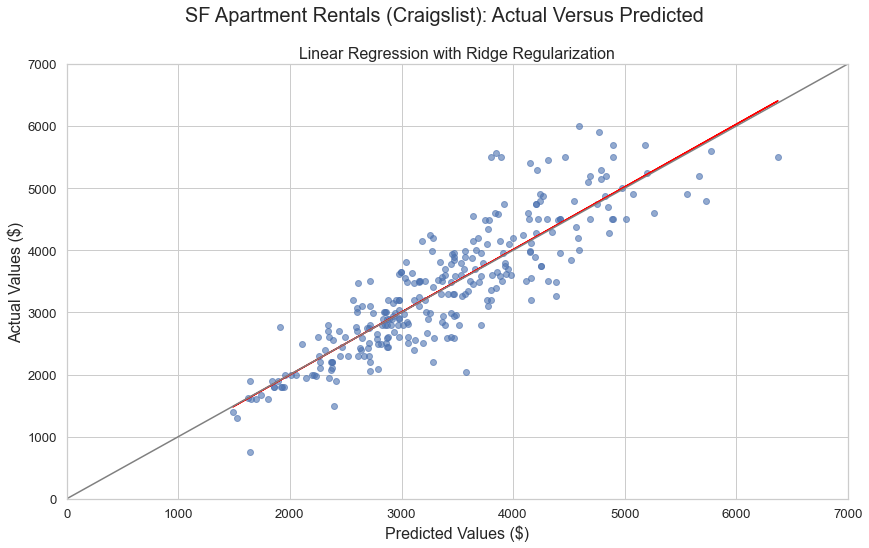

In [31]:
plt.figure(figsize=(14, 8))
plt.scatter(rid_predict, y_test, alpha=.6) 

z = np.polyfit(rid_predict, y_test, 1)
p = np.poly1d(z)
plb.plot(rid_predict, p(rid_predict), 'm-', color='red')
plt.plot(np.linspace(0,7000,1000), np.linspace(0,7000,1000), color='grey')

plt.xlim(0, 7000)
plt.ylim(0, 7000)

plt.suptitle('SF Apartment Rentals (Craigslist): Actual Versus Predicted', fontsize=20, fontname='Arial')
plt.title('Linear Regression with Ridge Regularization', fontsize=16, fontname='Arial')
plt.xlabel('Predicted Values ($)', fontsize=16, fontname='Arial')
plt.ylabel('Actual Values ($)', fontsize=16, fontname='Arial');

#plt.savefig('img/ridge_actual_predicted.png');

In [32]:
rid_residual = (y_test - rid_predict)

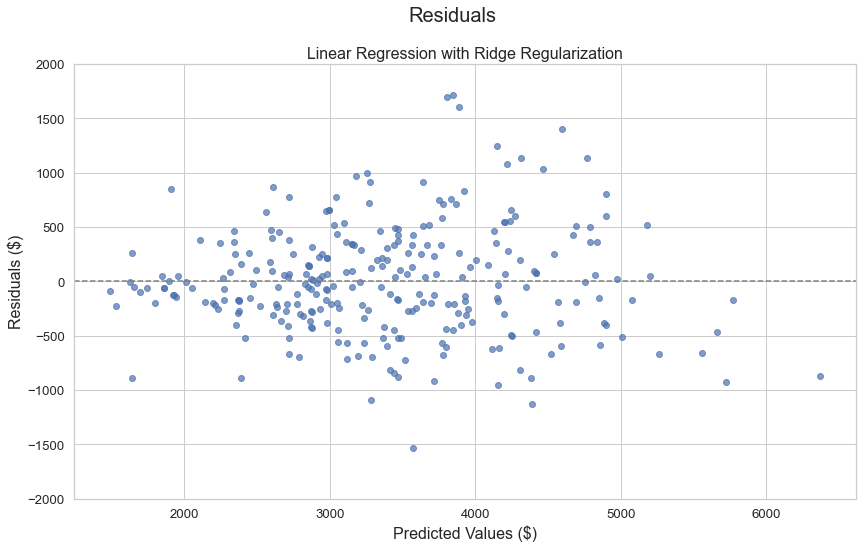

In [33]:
plt.figure(figsize=(14, 8))
plt.scatter(rid_predict, rid_residual, alpha=.7)   

plt.axhline(0, linestyle='--', color='grey')
plt.suptitle('Residuals', fontsize=20, fontname='Arial')
plt.title('Linear Regression with Ridge Regularization', fontsize=16, fontname='Arial')
plt.ylim(-2000, 2000)
plt.xlabel('Predicted Values ($)', fontsize=16, fontname='Arial')
plt.ylabel('Residuals ($)', fontsize=16, fontname='Arial');

#plt.savefig('img/ridge_residuals.png');

# More Charts

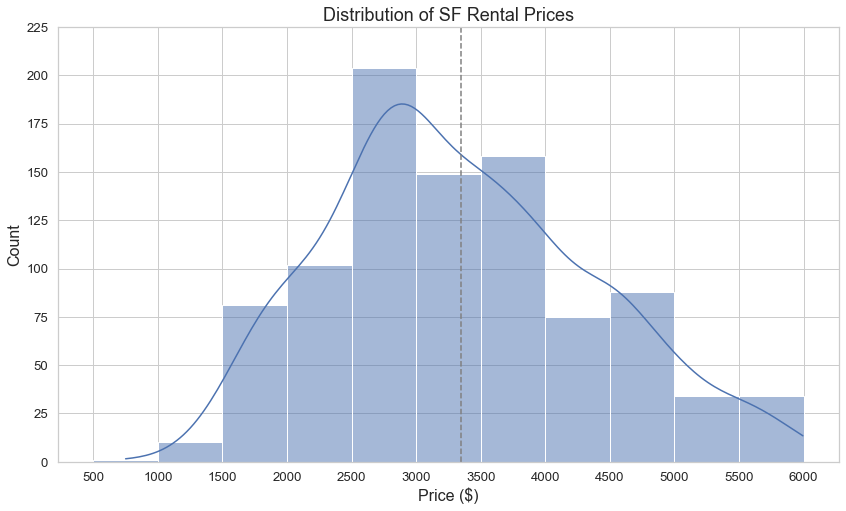

In [34]:
plt.figure(figsize=(14, 8))
ax_actual = sns.histplot(sf.price, kde=True, bins=(list(range(500, 6001, 500))))
plt.axvline(sf.price.mean(), linestyle='--', color='grey')
#ax_predict = sns.histplot(rid_predict, kde=True)
ax_actual.set_title('Distribution of SF Rental Prices', fontname='Arial', fontsize=18)
ax_actual.set_xlabel('Price ($)', fontname='Arial', fontsize=16)
ax_actual.set_ylabel('Count', fontname='Arial', fontsize=16)
ax_actual.set_yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225])
ax_actual.set_xticks(list(range(500, 6001, 500)))
ax_actual.set_xticklabels(list(range(500, 6001, 500)));

#plt.savefig('img/price_distribution.png');